## Generates fire perimeter and burn severity mapping based on UAVSAR PolSAR data

More information about file & data requirement can be found in README.md

In [1]:
import sys
from pathlib import Path

# Add the path to the utils folder to sys.path
utils_path = Path('../python').resolve()
sys.path.append(str(utils_path))

In [2]:
from classify import gen_perimeter_sbs 

Note there will be user-inputs required during the process

1) At the start: to select base-image for reprojection
2) First visualization: to select polgyons to include for perimeter
3) Second visualization: to select perimeter to use for burn severity

*NOTE*: The `superpixel_path` parameter will be none during the first run for any fire. Afterward, a superpixel segmentation label will be outputted as a numpy array that can be used for future runs of the same data to save run time. The path to that array will be the value of the `superpixel_path` parameter.

Available flight image files:
0: /Volumes/BlueT7/test_bob/SanAnd_08525_18076_003_181011_HVHV_rtc_cropped_25km.tif
1: /Volumes/BlueT7/test_bob/SanAnd_08525_21065_014_211117_HVHV_rtc_cropped_25km.tif
2: /Volumes/BlueT7/test_bob/SanAnd_08527_18001_010_180205_HVHV_rtc_cropped_25km.tif
3: /Volumes/BlueT7/test_bob/SanAnd_08527_20029_004_201014_HVHV_rtc_cropped_25km.tif


Enter the index of the image you want to select as the base-flight for reprojection. The rest of the images will be reproject to this profile :  2


Preprocessing images to merge...
/Volumes/BlueT7/test_bob/bobcat_perimeter_sbs_merged_0.tif is outputted.
/Volumes/BlueT7/test_bob/bobcat_perimeter_sbs_merged_1.tif is outputted.
Performing superpixel segmentation...
/Volumes/BlueT7/test_bob/bobcat_perimeter_sbs_superpixel_labels_minsize15.npy is created and saved.


/Users/krismannino/anaconda3/envs/classification/lib/python3.12/site-packages/scipy/ndimage/_measurements.py:642: RuntimeWarning: invalid value encountered in divide
  means = sums / counts


Running Perimeter Classification...


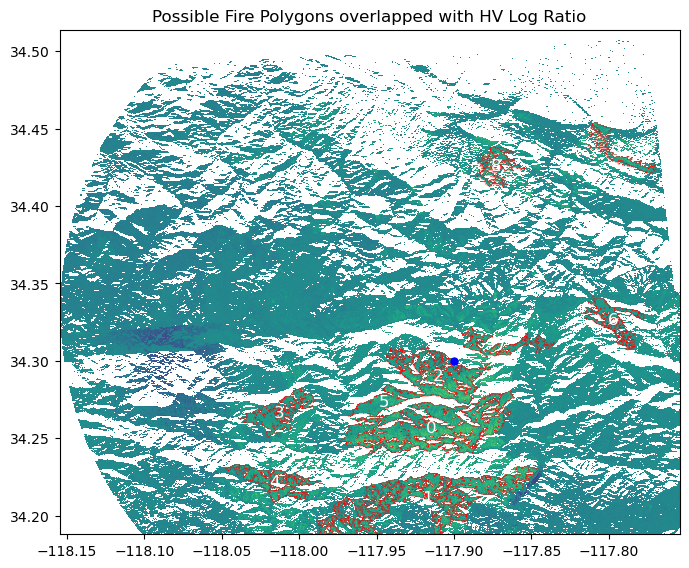

Enter a list of index to keep (e.g., 0,1,5,6) as part of perimeter. Enter -1 to keep all. 3,4,5,0,1,2


/Volumes/BlueT7/test_bob/bobcat_perimeter_sbs_uavsar_perimeter.geojson is outputted.
Concave Hull Ratio: 0.02
/Volumes/BlueT7/test_bob/bobcat_perimeter_sbs_uavsar_perimeter_concave_0.02.geojson is outputted.
/Volumes/BlueT7/test_bob/bobcat_perimeter_sbs_uavsar_perimeter_convex.geojson is outputted.


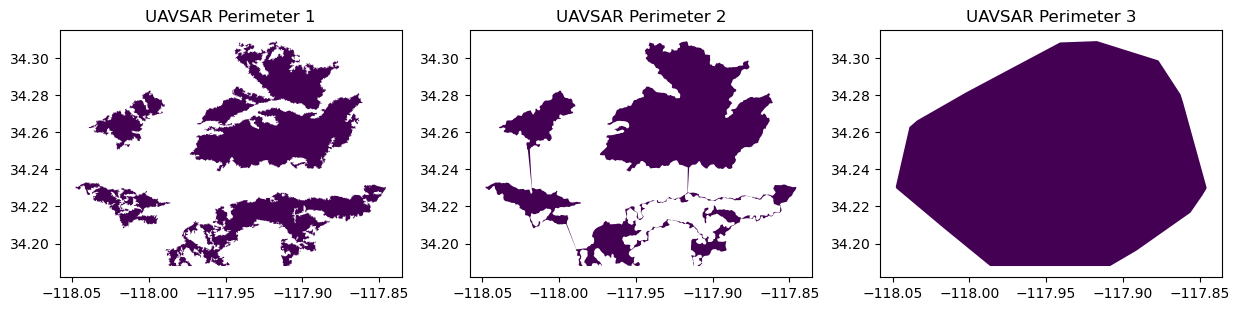

In [ ]:
# Generate fire perimeter using UAVSAR data and a burn severity based on generated perimeter
# Can go into classify.py to look at more information regarding the perimeters
gen_perimeter_sbs(data_path = '/Volumes/BlueT7/test_bob/',
                  root_name = 'bobcat_perimeter_sbs',
                  resampling = 'bilinear',
                  longitude = -117.9,
                  latitude = 34.3,
                  min_area_sq_km = 1, # optional, depending on the fire size
                  min_size = 15, # optional but important for customization
                  weight = 5.0, # optional
                  top_k_index = 10, # optional
                  superpixel_path = None # optional but would be useful if running multiple times
                  )

## Combining perimeters of large fires

If a fire is large and its area requires coverage from multiple UAVSAR flight lines(ex: Bobcat(2020)-2 lines & Station(2009)-2 lines), the product above will need to be run more than once. 

To combine the outputted perimeters into a single geojson file, `merge_geojson` from `process_utils.py` can be used to combine the GeoDataFrames(GDF) and use gdf's built-in `to_file` function to save the combined GDF.